# Day 14

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
A = np.array([[2, 0], [-1, 1], [0, 2]])
A

array([[ 2,  0],
       [-1,  1],
       [ 0,  2]])

In [5]:
b = np.array([[1], [0], [-1]])
b

array([[ 1],
       [ 0],
       [-1]])

In [6]:
Apinv = np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)
Apinv

array([[ 0.41666667, -0.16666667,  0.08333333],
       [ 0.08333333,  0.16666667,  0.41666667]])

In [7]:
x = np.dot(Apinv, b)
x

array([[ 0.33333333],
       [-0.33333333]])

In [8]:
np.dot(A, x) - b

array([[-0.33333333],
       [-0.66666667],
       [ 0.33333333]])

In [9]:
x, resid, rank, s = np.linalg.lstsq(A, b)
x

array([[ 0.33333333],
       [-0.33333333]])

# SymPy로 공부하는 미분과 적분

SymPy는 심볼릭 연산(symbolic operation)을 지원하기 위한 파이썬 패키지이다. 심볼릭 연산이란 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산을 말한다. 즉,  $x2$ 의 미분 연산을 수행하면 그 결과가  $2x$ 란 형태로 출력된다.

딥 러닝(deep learning) 등에 많이 사용되는 파이썬의 theano 패키지나 tensorflow 패키지도 뉴럴 네트워크 트레이닝시에 필요한 기울기 함수 계산을 위해 이러한 심볼릭 연산 기능을 갖추고 있다.

In [10]:
import sympy

# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')  

In [11]:
x = sympy.symbols('x')
x

x

In [12]:
type(x)

sympy.core.symbol.Symbol

In [14]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

In [15]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [16]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

편미분을 하는 경우에는 어떤 변수로 미분하는지를 diff 함수에 명시해야 한다.

symbols명령에서는 다음과 같이 문자열에 띄어쓰기를 포함시켜 여러개의 심볼 변수를 동시 생성할 수도 있다.

In [30]:
x, y = sympy.symbols('x y')
f = x**2 + x*y + y**2
f

 2          2
x  + x⋅y + y 

In [31]:
sympy.diff(f, x)

2⋅x + y

In [32]:
sympy.diff(f, y)

x + 2⋅y

In [34]:
sympy.diff(sympy.diff(f, x),x)

2

상수 심볼을 포함하는 함수를 미분하는 경우, SymPy는 어떤 심볼이 상수이고 어떤 심볼이 변수인지 알 수 없기 때문에 편미분인 것처럼 입력 변수를 지정해야 한다.



In [39]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x-mu))**2/sigma**2
f

 -2⋅μ + 2⋅x
ℯ          
───────────
      2    
     σ     

In [40]:
sympy.diff(f, x)

   -2⋅μ + 2⋅x
2⋅ℯ          
─────────────
       2     
      σ      

In [41]:
sympy.simplify(sympy.diff(f, x))

   -2⋅μ + 2⋅x
2⋅ℯ          
─────────────
       2     
      σ      

**연습문제 3**

In [23]:
x = sympy.symbols('x')

In [28]:
f1 = x**3-1

In [29]:
sympy.diff(f1)

   2
3⋅x 

In [35]:
f2 = sympy.log(x**2-2)

In [36]:
sympy.diff(f2)

 2⋅x  
──────
 2    
x  - 2

In [37]:
f3 = sympy.exp(2*x**3)

In [38]:
sympy.diff(f3)

         3
   2  2⋅x 
6⋅x ⋅ℯ    

# 행렬의 미분

### 중요 개념

* 행렬 미분
* 그레디언트 벡터
* 자코비안 행렬, 헤시안 행렬
* 선형 모형의 미분
* 이차 형식의 미분
* 대각 성분의 미분
* 로그 행렬식의 미분

지금까지는 행렬의 원소로 스칼라 값, 즉 숫자를 사용했지만 사실 다음과 같이 함수도 행렬의 원소가 될 수 있다.

$$ f(x) = \begin{bmatrix} x^2 & 2x \\ \log x & e^{x^2} \end{bmatrix} $$

이는 함수의 종속 변수 $y$가 행렬인 경우라고 볼 수 있다.

반대로 여러개의 입력을 가지는 다변수 함수는 함수의 독립 변수가 벡터인 경우로 볼 수 있다.

$$ f(x_1, x_2) = f\left( \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \right) $$

이를 확장하면 행렬을 입력으로 가지는 것도 가능하다.

이러한 행렬을 입력이나 출력으로 가지는 함수를 미분하는 것을 행렬 미분이라고 한다. 사실 행렬 미분은 정확하게는 미분이 아닌 편미분(partial derivative)이지만 여기에서는 편의상 미분이라고 쓰겠다.

또한 행렬 미분에는 분자 중심 표현법(Numerator-layout notation)과 분모 중심 표현법(Denominator-layout notation) 두 가지가 있는데 데이터 분석에는 주로 분모 중심 표현법이 사용되므로 여기에서는 분모 중심 표현법으로 서술한다.

## 스칼라를 벡터로 미분하는 경우


데이터 분석에서는 함수의 종속 변수 $y$가 스칼라이고 독립 변수 $x$가 (다차원)벡터인 다변수 함수를 사용하는 경우가 많다. 따라서 편미분 값도 $\frac{\partial y}{\partial x_1}, \frac{\partial y}{\partial x_2}, \cdots$ 등으로 여러 개가 존재한다. 

이렇게 스칼라를 벡터로 미분하는 경우에는 결과를 열 벡터로 표시한다. 이렇게 만들어진 벡터를 **그레디언트 벡터(gradient vector)**라고 하고 $\nabla y$로 표기한다.


$$
\nabla y = 
\frac{\partial y}{\partial \mathbf{x}} =
\begin{bmatrix}
\dfrac{\partial y}{\partial x_1}\\
\dfrac{\partial y}{\partial x_2}\\
\vdots\\
\dfrac{\partial y}{\partial x_N}\\
\end{bmatrix}
$$



예를 들어 다음과 같은 다변수 함수 

$$ f(x, y) = 2x^2 + 6xy + 7y^2 - 26x - 54y + 107 $$

에 대한 그레디언트 벡터를 구하면

$$
\nabla f = 
\begin{bmatrix}
\dfrac{\partial f}{\partial x}\\
\dfrac{\partial f}{\partial y}\\
\end{bmatrix} =
\begin{bmatrix}
4x + 6y - 26\\
6x + 14y - 54\\
\end{bmatrix}
$$

가 된다.

이를 그림으로 나타내면 다음과 같다. 우선 2개의 독립 변수를 가지는 함수의 형태는 다음과 같이 3차원 서피스(surface) 플롯으로 표현할 수 있다.

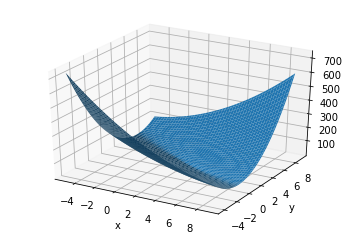

In [46]:
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(-5, 9, 100)
yy = np.linspace(-4, 9, 100)
X, Y = np.meshgrid(xx, yy)

Z = f(X, Y)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.gca(projection='3d').plot_surface(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

또는 2차원 상에서 컨투어(contour) 플롯으로도 나타낼 수 있다. 이 때 각 위치에서의 그레디언트 벡터를 화살표로 표현하는 것도 가능하다. 이러한 플롯을 퀴버(quiver) 플롯이라고 한다. 

퀴버 플롯에서 그레디언트 벡터는 다음과 같은 특성을 지닌다.

* 그레디언트 벡터의 방향은 함수 곡면의 기울기가 가장 큰 방향, 즉 단위 길이당 함수 값(높이)이 가장 크게 증가하는 방향을 가리킨다.
* 그레디언트 벡터의 크기는 기울기를 의미한다. 즉 벡터의 크기가 클 수록 함수 곡면의 기울기가 커진다.

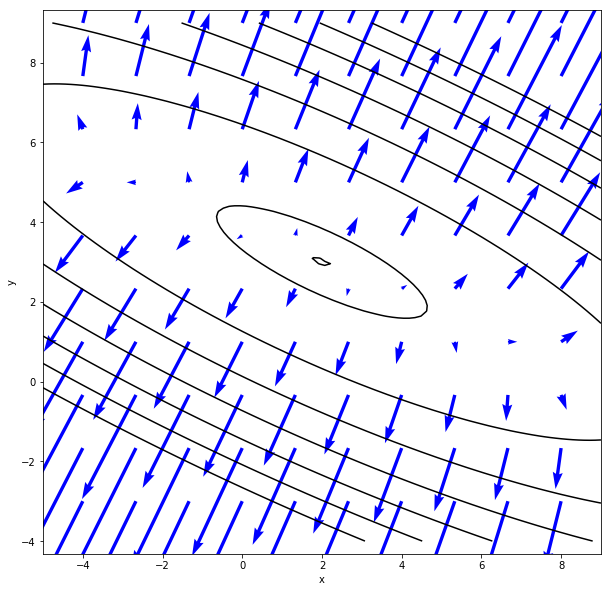

In [47]:
def gx(x, y):
    return 4 * x + 6 * y - 26

def gy(x, y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(-4, 8, 10)
yy2 = np.linspace(-3, 9, 10)
X2, Y2 = np.meshgrid(xx2, yy2)

GX = gx(X2, Y2)
GY = gy(X2, Y2)

plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, levels=[0.05, 5, 50, 100, 150, 200, 250, 300], colors='k')
plt.quiver(X2, Y2, GX, GY, color='blue', scale=400)
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 행렬 미분 법칙

다변수 함수를 미분하여 그레디언트를 구할 때는 다음 두가지 법칙이 유용하게 쓰인다.

### 벡터 미분 규칙 1: 선형 모형

선형 모형을 미분하면 가중치 벡터가 된다.

$$\frac{\partial \mathbf{w}^{T}\mathbf{x}}{\partial \mathbf{x}} = \frac{\partial \mathbf{x}^{T}\mathbf{w}}{\partial \mathbf{x}} = \mathbf{w}$$ 

(증명)

$$ 
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial \mathbf{x}}=
\begin{bmatrix}
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_1} \\
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_N} \\
\end{bmatrix} =
\begin{bmatrix}
\dfrac{\partial (w_1 x_1 + {w_2 x_2} + \cdots + {w_N x_N})}{\partial x_1} \\
\dfrac{\partial ({w_1 x_1} + w_2 x_2 + \cdots + {w_N x_N})}{\partial x_2} \\
\vdots \\
\dfrac{\partial ({w_1 x_1} + {w_2 x_2} + \cdots + w_N x_N)}{\partial x_N} \\
\end{bmatrix} =
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_N \\
\end{bmatrix}
= \mathbf{w} 
$$

### 벡터 미분 규칙 2: 이차 형식

이차 형식을 미분하면 행렬과 벡터의 곱으로 나타난다.

$$\frac{\partial \mathbf{x}^{T}\mathbf{A}\mathbf{x}}{\partial \mathbf{x}} = (\mathbf{A} + \mathbf{A}^{T})\mathbf{x}$$

(증명)


$$ 
\begin{eqnarray}
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial \mathbf{x}}
&=&
\begin{bmatrix}
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_1} \\
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_N} \\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_1} \\
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_N} \\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\dfrac{\partial 
\left(
\begin{matrix}
a_{11}x_1x_1 + a_{12}x_1x_2 + \cdots + a_{1N}x_1x_N + \\
a_{21}x_2x_1 + \cancel{a_{22}x_2x_2} + \cdots + \cancel{a_{2N}x_2x_N} + \\
\cdots  \\
a_{N1}x_Nx_1 + \cancel{a_{N2}x_Nx_2} + \cdots + \cancel{a_{NN}x_Nx_N} 
\end{matrix}
\right)}{\partial x_1} \\
\dfrac{\partial 
\left(
\begin{matrix}
\cancel{a_{11}x_1x_1} + a_{12}x_1x_2 + \cdots + \cancel{a_{1N}x_1x_N} + \\
a_{21}x_2x_1 + a_{22}x_2x_2 + \cdots + a_{2N}x_2x_N + \\
\cdots  \\
\cancel{a_{N1}x_Nx_1} + a_{N2}x_Nx_2 + \cdots + \cancel{a_{NN}x_Nx_N}
\end{matrix}
\right)}{\partial x_2} \\
\vdots \\
\end{bmatrix} 
\\
&=&
\begin{bmatrix}
\sum_{i=1}^{N} a_{1i} x_i + \sum_{i=1}^{N} a_{i1} x_i\\
\sum_{i=1}^{N} a_{2i} x_i + \sum_{i=1}^{N} a_{i2} x_i\\
\vdots \\
\sum_{i=1}^{N} a_{Ni} x_i + \sum_{i=1}^{N} a_{iN} x_i\\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\sum_{i=1}^{N} a_{1i} x_i\\
\sum_{i=1}^{N} a_{2i} x_i\\
\vdots \\
\sum_{i=1}^{N} a_{Ni} x_i\\
\end{bmatrix}
+
\begin{bmatrix}
\sum_{i=1}^{N} a_{i1} x_i \\
\sum_{i=1}^{N} a_{i2} x_i \\
\vdots \\
\sum_{i=1}^{N} a_{iN} x_i \\
\end{bmatrix} \\
&=&
\mathbf{A} \mathbf{x}  + \mathbf{A}^T \mathbf{x} 
=
(\mathbf{A} + \mathbf{A}^T)\mathbf{x} 
\end{eqnarray}
$$




위의 두 가지 경우는 1차 다항식과 2차 다항식에 대한 스칼라 미분과 비슷하다. 두 경우를 비교해 보면 이 공식을 외우는데 도움이 된다.

| 스칼라 미분                        | 벡터/행렬 미분                           |
| ---------------------------------- | ---------------------------------------- |
| $$ax \;\; \rightarrow \;\; a$$     | $$w^Tx \;\; \rightarrow \;\; w$$         |
| $$ax^2 \;\; \rightarrow \;\; 2ax$$ | $$x^TAx \;\; \rightarrow \;\; (A+A^T)x$$ |

## 벡터를 스칼라로 미분하는 경우

반대로 함수의 종속 변수 $y$가 (다차원)벡터이고 독립 변수 $x$가 스칼라인 경우는 함수가 여러 개라고 보는 것과 마찬가지이다.

$$ y_1 = f_1(x) $$

$$ y_2 = f_2(x) $$

$$ \vdots $$

$$ y_m = f_m(x) $$

$$ \downarrow $$

$$
\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots\\
y_M \\
\end{bmatrix}
= \mathbf{f}(x)
$$


따라서 미분 값도 $\frac{\partial y_1}{\partial x}, \frac{\partial y_2}{\partial x}, \cdots$ 등으로 여러 개가 존재한다. 

벡터를 스칼라로 미분하는 경우에는 결과를 행 벡터로 표시한다.


$$
\frac{\partial \mathbf{y}}{\partial x} = \left[
\frac{\partial y_1}{\partial x}
\frac{\partial y_2}{\partial x}
\cdots
\frac{\partial y_M}{\partial x}
\right].
$$

## 벡터를 벡터로 미분하는 경우

함수의 종속 변수와 독립 변수가 모두 벡터(다차원) 데이터인 경우에는 독립 변수 각각과 종속 변수 각각의 조합에 대해 모두 미분이 존재한다. 따라서 도함수는 행렬 형태가 된다. 이렇게 만들어진 도함수의 행렬을 **자코비안 행렬(Jacobian matrix)** 이라고 한다. 자코비안 행렬을 만들때는 벡터를 스칼라로 미분하는 경우나 스칼라를 벡터를 미분하는 경우와 행/열의 방향이 다르다는 점에 유의한다.




$$
\mathbf J = \frac{d\mathbf y}{d\mathbf x} = \begin{bmatrix}
    \dfrac{\partial y_1}{\partial \mathbf x}^T \\ \vdots \\ \dfrac{\partial y_M}{\partial \mathbf x}^T \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial y_1}{\partial x_1} & \cdots & \dfrac{\partial y_1}{\partial x_N}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial y_M}{\partial x_1} & \cdots & \dfrac{\partial y_M}{\partial x_N} \end{bmatrix}
$$


## 스칼라를 행렬로 미분

종속 변수가 스칼라 값이고 독립 변수가 행렬인 경우에는 도함수 행렬의 모양이 독립 변수 행렬 $X$와 같다. 

$$
\frac{\partial y}{\partial \mathbf{X}} =
\begin{bmatrix}
\frac{\partial y}{\partial x_{1,1}} & \frac{\partial y}{\partial x_{1,2}} & \cdots & \frac{\partial y}{\partial x_{1,N}}\\
\frac{\partial y}{\partial x_{2,1}} & \frac{\partial y}{\partial x_{2,2}} & \cdots & \frac{\partial y}{\partial x_{2,N}}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial y}{\partial x_{M,1}} & \frac{\partial y}{\partial x_{M,2}} & \cdots & \frac{\partial y}{\partial x_{M,N}}\\
\end{bmatrix}
$$

다변수 함수의 2차 도함수는 다음과 같이 행렬로 나타낼 수 있고 이러한 행렬을 **헤시안 행렬(Hessian matrix)**이라고 한다.

$$
H = \begin{bmatrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_1\,\partial x_N} \\
  \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_2\,\partial x_N} \\
  \vdots & \vdots & \ddots & \vdots \\
  \dfrac{\partial^2 f}{\partial x_N\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_N\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_N^2}
\end{bmatrix}
$$

### 행렬 미분 규칙 3: 행렬 곱의 대각성분

두 정방 행렬을 곱해서 만들어진 행렬의 대각성분(trace)는 스칼라이다. 이 스칼라를 곱셈의 뒤 행렬로 미분하면 앞의 행렬의 전치 행렬이 나온다.


$$ \dfrac{\partial \text{tr} (\mathbf{B}\mathbf{A})}{\partial \mathbf{A}} = \mathbf{B}^T$$

(증명)

$$ \text{tr}(\mathbf{B}\mathbf{A}) = \sum_{i=1}^N \sum_{j=1}^N b_{ji} a_{ij} $$

$$ \dfrac{\partial \text{tr} (\mathbf{B}\mathbf{A})}{\partial a_{ij}} = b_{ji} $$ 

### 행렬 미분 규칙 4: 행렬식의 로그

행렬식(determinant)는 스칼라이고 이 값의 로그 값도 스칼라이다. 이 값을 원래의 행렬로 미분하면 원래 행렬의 역행렬의 전치 행렬이 된다.

$$ \dfrac{\partial \log \det \mathbf{A} }{\partial \mathbf{A}} = (\mathbf{A}^{-1})^T $$

(증명)

행렬식의 정의에서

$$ \dfrac{\partial}{\partial a_{i,j}} \det A = C_{i,j} $$

행렬식과 역행렬의 관계에서 

$$ \dfrac{\partial}{\partial A} \det A = C = (\det A) (A^{-1})^T  $$

로그 함수 공식에 대입하면 

$$ \dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} = \dfrac{(\det A) (A^{-1})^T}{\det A} = (A^{-1})^T $$